In [1]:
# load dependencies
# Load idx file to numpy
# separate the Test cases, and training data
# unwrap the training data into linear inputs
# preprocess labels to match desired output vector in neural network
# extract neural network to a function with weights, inputs, biases, desired output, input layer, hidden layer, output layer, iterations, genration number as arguments
# create a init weights, biases function

# pass to neural network
# create test function to print out the percentage.

In [2]:
# load dependencies
!pip install numpy matplotlib idx2numpy

  Using cached idx2numpy-1.2.3-py3-none-any.whl
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 4.0 MB/s eta 0:00:004.1 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 3.9 MB/s eta 0:00:004.0 MB/s eta 0:00:01
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 4.1 MB/s eta 0:00:004.2 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 4.1 MB/s eta 0:00:00 MB/s eta 0:00:01:01


In [3]:
import matplotlib.pyplot as plt

def plot_weights(weight_plot, bias_plot, num_layers, size_output_layer, size_last_hidden_layer):
    plt.figure(figsize=(15, 10))
    
    for output_node in range(5):
        j = int(output_node * (size_output_layer / 5))
        for hidden_node in range(5):
            k = int(hidden_node * (size_last_hidden_layer / 5))
            plot = []
            for t in range(len(weight_plot)):
                plot.append(weight_plot[t][num_layers-1][j][k])
            plt.plot(plot, label="weight[2]["+str(j)+"]["+str(k)+"]")
    
    plt.ylabel('Value')
    plt.xlabel('Iterations')
    plt.legend()
    plt.show()

(60000, 28, 28)
(60000,)


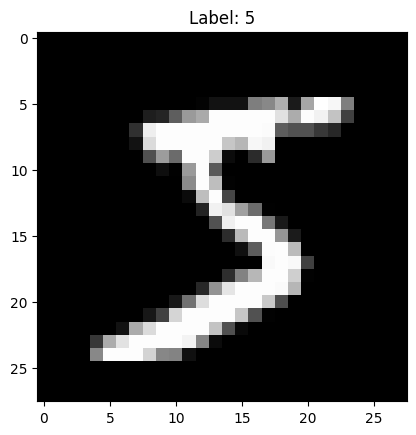

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [5]:
# Load idx file to numpy
import idx2numpy
import matplotlib.pyplot as plt

# Load the MNIST dataset
images_file = 'training_data/train-images.idx3-ubyte'  # Path to the images file
labels_file = 'training_data/train-labels.idx1-ubyte'  # Path to the labels file

images = idx2numpy.convert_from_file(images_file)
labels = idx2numpy.convert_from_file(labels_file)

# Function to display an image
def display_image(index):
    plt.imshow(images[index], cmap='gray')
    plt.title(f'Label: {labels[index]}')
    plt.show()

def display_image_label_index(sample_image, sample_label, index):
    plt.imshow(sample_image[index], cmap='gray')
    plt.title(f'Label: {sample_label[index]}')
    plt.show()

print(images.shape)
print(labels.shape)
display_image(0)
print(images[0])

In [6]:
# separate the Test cases, and training data
import numpy as np
training_images = images[:50000]
training_labels = labels[:50000]
test_images = images[-10000:]
test_labels = labels[-10000:]
print(training_images.shape)
print(test_images.shape)

(50000, 28, 28)
(10000, 28, 28)


In [7]:
# unwrap the training data into linear inputs
inputs = []
test_inputs = []

for image in training_images:
    inputs.append(image.flatten().reshape(1, 28*28) / 255)
for image in test_images:
    test_inputs.append(image.flatten().reshape(1, 28*28) / 255)

print(inputs[0].shape)
print(test_inputs[0].shape)

(1, 784)
(1, 784)


In [8]:
# preprocess labels to match desired output vector in neural network
outputs = []
test_outputs = []
for label in training_labels:
    output = np.zeros((1, 10))
    output[0][label] = 1
    outputs.append(output)

for label in test_labels:
    output = np.zeros((1, 10))
    output[0][label] = 1
    test_outputs.append(output)

In [9]:
# create a init weights, biases function
def initialise_neural_network(size_input_layer, size_output_layer, size_hidden_layer, num_layers):
    input_weights_shape = (size_hidden_layer, size_input_layer)
    hidden_weights_shape = (size_hidden_layer, size_hidden_layer)
    output_weights_shape = (size_output_layer, size_hidden_layer)
    
    input_bias_shape = (1, size_hidden_layer)
    hidden_bias_shape = (1, size_hidden_layer)
    output_bias_shape = (1, size_output_layer)
    
    input_weights = np.random.randn(*input_weights_shape) * np.sqrt(1. / size_input_layer)
    output_weights = np.random.randn(*output_weights_shape) * np.sqrt(1. / size_hidden_layer)
    
    weights = [input_weights]
    bias = [np.zeros(input_bias_shape)]
    for _ in range(num_layers - 2):
        hidden_weights = np.random.randn(*hidden_weights_shape) * np.sqrt(1. / size_hidden_layer)
        weights.append(hidden_weights)
        bias.append(np.zeros(hidden_bias_shape))
    weights.append(output_weights)
    bias.append(np.zeros(output_bias_shape))
    return weights, bias

In [10]:
def sigmoid(x):
    return np.where(x >= 0,
                    1 / (1 + np.exp(-x)),
                    np.exp(x) / (1 + np.exp(x)))
    # return np.maximum(x, 0)

def sigmoid_derivative(x):
    sig = sigmoid(x)
    return sig * (1 - sig)
    # return np.where(x > 0, 1, 0)

def softmax(x):
    # Subtracting the max for numerical stability
    x_max = np.max(x, axis=-1, keepdims=True)
    e_x = np.exp(x - x_max)
    return e_x / np.sum(e_x, axis=-1, keepdims=True)


In [11]:
def feedforward(input_activation, weights, bias, num_layers):
    activation = bias.copy()
    z_sum = bias.copy()
    for layer in range(0, num_layers):
        z = z_sum[layer].copy()
        if(layer == 0):
            z = input_activation.dot(weights[layer].T) + bias[layer]
        else: 
            z = activation[layer-1].dot(weights[layer].T) + bias[layer]
        activation[layer] = sigmoid(z)
        # if layer == num_layers - 1:
        #     activation[layer] = softmax(z)
        # else:
        #     activation[layer] = sigmoid(z)
        
    return (activation, z_sum)

In [12]:
def backprop(t, inputs, outputs, weights, bias, num_layers, activation, z_sum, learning_rate):
    deltas = bias.copy()
    for layer in reversed(range(0, num_layers)):
        if(layer == num_layers-1):
            delta = (activation[layer] - outputs[t])
        else: 
            delta = deltas[layer + 1].dot(weights[layer + 1]) * sigmoid_derivative(z_sum[layer])
        deltas[layer] = delta
    
    for layer in range(num_layers):
        if(layer == 0):
            weights_delta = deltas[layer].T.dot(inputs[t])
        else: 
            weights_delta = deltas[layer].T.dot(activation[layer-1])
        weights[layer] = weights[layer] - learning_rate * weights_delta
        bias[layer] = bias[layer] - learning_rate * deltas[layer]
    
    return (weights, bias)

In [13]:
def test(test_inputs, test_outputs, weights, bias, num_layers):
    correct_predictions = 0
    for t in range(len(test_outputs)):
        activation, _ = feedforward(test_inputs[t], weights, bias, num_layers)
        predicted_label = np.argmax(activation[-1])
        true_label = np.argmax(test_outputs[t])
        if predicted_label == true_label:
            correct_predictions += 1
    
    accuracy = correct_predictions / len(test_inputs)
    print(f"Accuracy: {accuracy * 100:.2f}%")
        

In [14]:
def train_neural_network(weights, bias, inputs, outputs, num_layers, learning_rate, weight_plot, bias_plot):
    for t in range(len(inputs)):
        (activation, z_sum) = feedforward(inputs[t], weights, bias, num_layers)
        (weights, bias) = backprop(t, inputs,outputs, weights, bias, num_layers, activation, z_sum, learning_rate)
        if(t%1000 == 0):
            weight_plot.append(weights.copy())
            bias_plot.append(bias.copy())
    
    return (weights, bias, weight_plot, bias_plot)

In [16]:
# neural netwok
# extract neural network to a function with weights, inputs, biases, desired output, input layer, hidden layer, output layer, iterations, genration number as arguments
def train(inputs, outputs, size_hidden_layer, num_layers, num_generations, learning_rate):
    weight_plot = []
    bias_plot = []
    size_input_layer = len(inputs[0][0])
    size_output_layer = len(outputs[0][0])
    (weights, bias) = initialise_neural_network(size_input_layer, size_output_layer, size_hidden_layer, num_layers)
    for gen in range(num_generations):
        (weights, bias, weight_plot, bias_plot) = train_neural_network(weights, bias, inputs, outputs, num_layers, learning_rate, weight_plot, bias_plot)
        print(f"gen: {gen} completed")
        test(test_inputs, test_outputs, weights, bias, num_layers)
        
    plot_weights(weight_plot, bias_plot, num_layers, size_output_layer, size_hidden_layer)
    return (weights, bias)

gen: 0 completed
Accuracy: 91.49%
gen: 1 completed
Accuracy: 92.43%
gen: 2 completed
Accuracy: 92.82%
gen: 3 completed
Accuracy: 93.08%
gen: 4 completed
Accuracy: 93.21%
gen: 5 completed
Accuracy: 93.32%
gen: 6 completed
Accuracy: 93.47%
gen: 7 completed
Accuracy: 93.59%
gen: 8 completed
Accuracy: 93.59%
gen: 9 completed
Accuracy: 93.60%


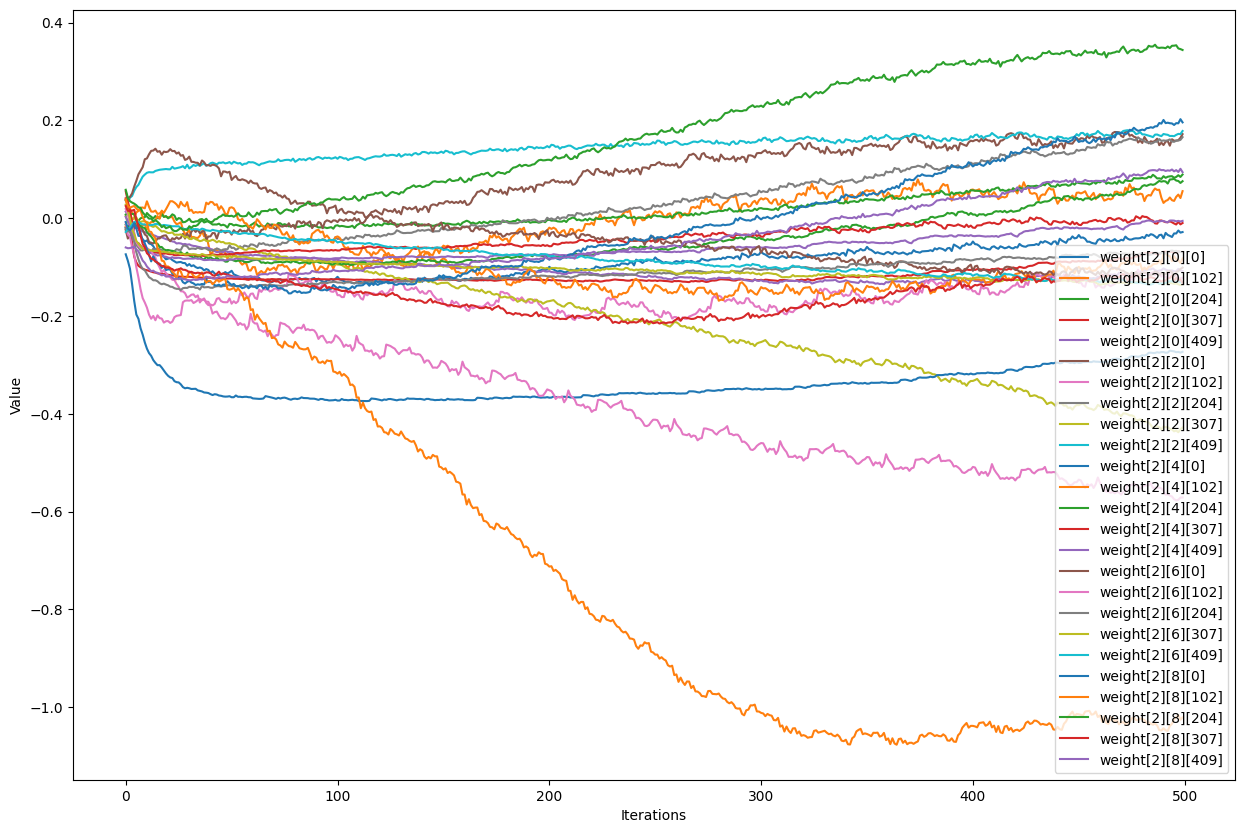

In [17]:
learning_rate = 0.01
generations = 10
num_layers = 3
size_hidden_layer = 512
(final_weights, final_bias) = train(inputs, outputs, size_hidden_layer, num_layers, generations, learning_rate)

In [59]:
test(test_inputs, test_outputs, final_weights, final_bias, num_layers)

Accuracy: 93.56%


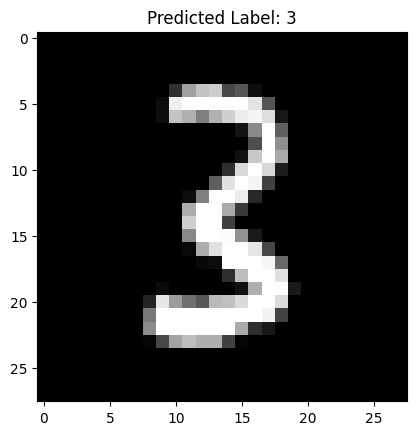

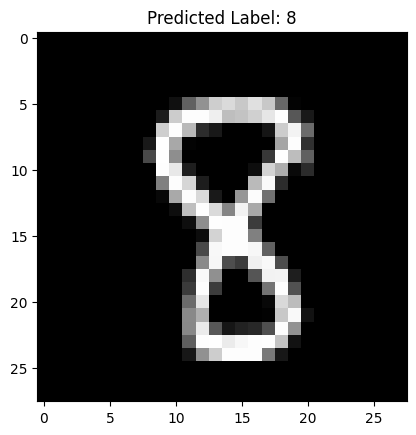

In [61]:
def predict(test_image, test_label, final_weights, final_bias, num_layers):    
    input_image = test_image.flatten().reshape(1, 28*28) / 255
    activation, _ = feedforward(input_image, final_weights, final_bias, num_layers)
    predicted_label = np.argmax(activation[-1])

    plt.imshow(test_image, cmap='gray')
    plt.title(f'Predicted Label: {predicted_label}')
    plt.show()

for i in range(2):
    predict(test_images[i], test_labels[i], final_weights, final_bias, num_layers)


In [62]:
!pip install opencv-python 

In [64]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def display_image(image):
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.show()

def preprocess_image(image_path, threshold=150):
    # Load the image
    image = cv2.imread(image_path)
    print(image.shape)
    display_image(image)
    # Convert to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    display_image(gray_image)

    # # Resize to 28x28 pixels
    resized_image = cv2.resize(gray_image, (28, 28))
    display_image(resized_image)

    
    inverted_image = 255 - resized_image
    display_image(inverted_image)

    _, thresholded_image = cv2.threshold(inverted_image, threshold, 255, cv2.THRESH_TOZERO)
    display_image(thresholded_image)
        
    return thresholded_image

(196, 196, 3)


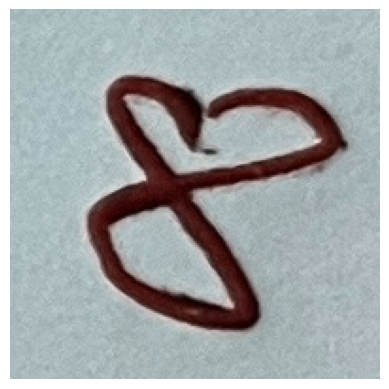

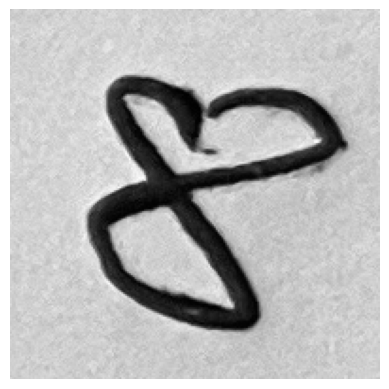

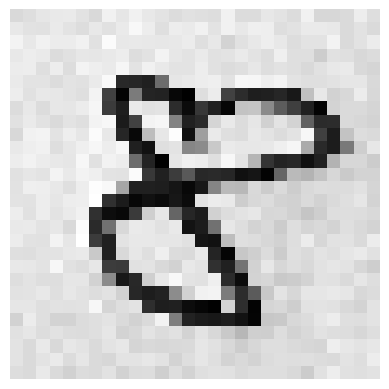

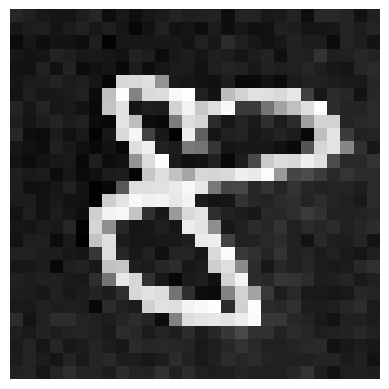

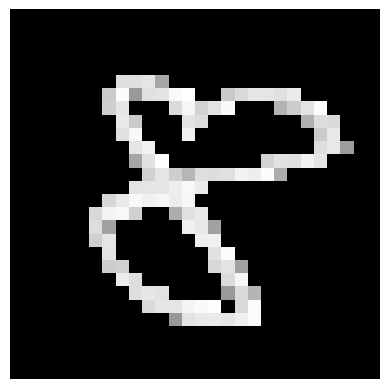

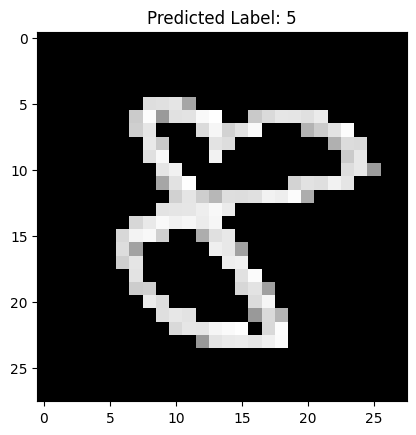

(194, 194, 3)


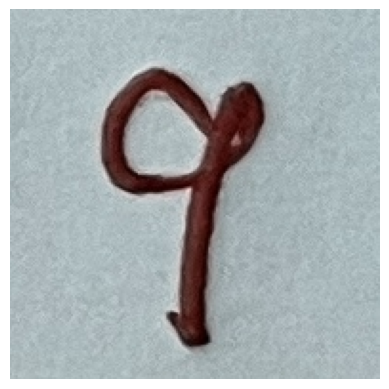

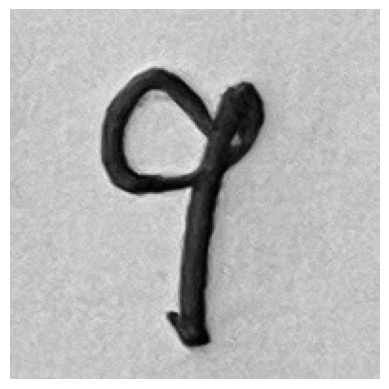

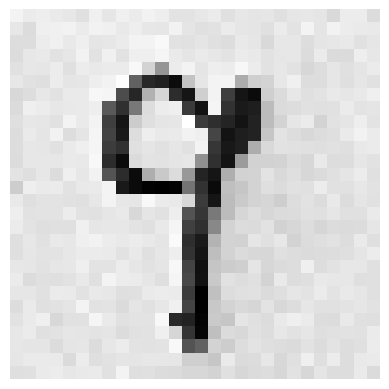

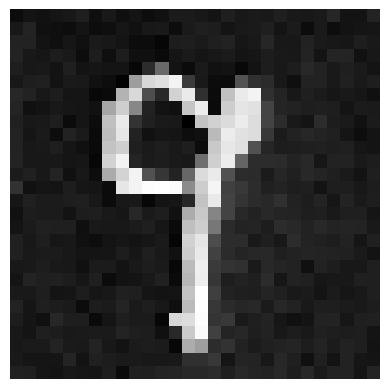

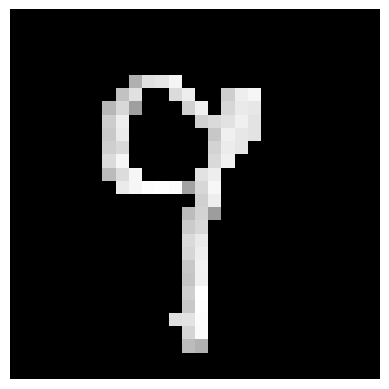

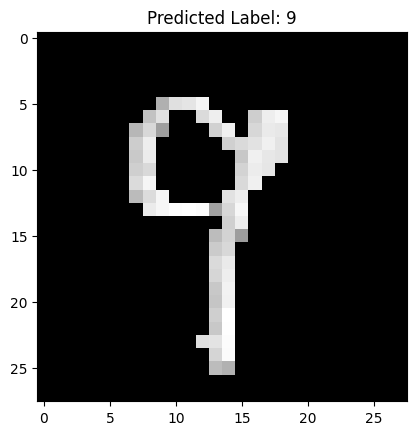

(185, 185, 3)


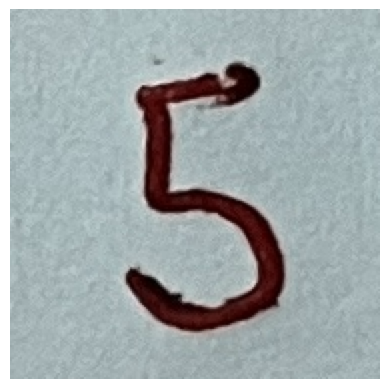

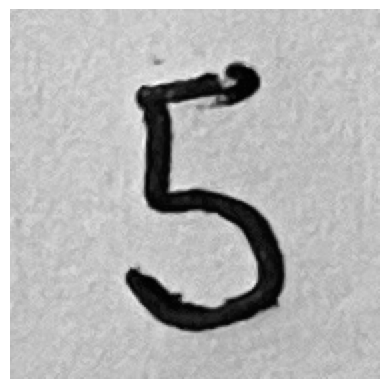

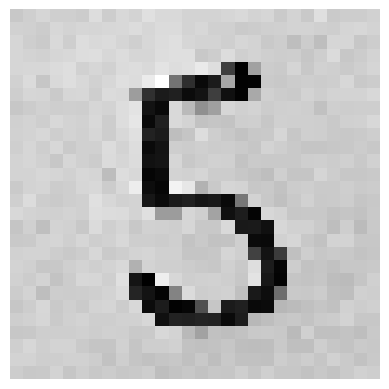

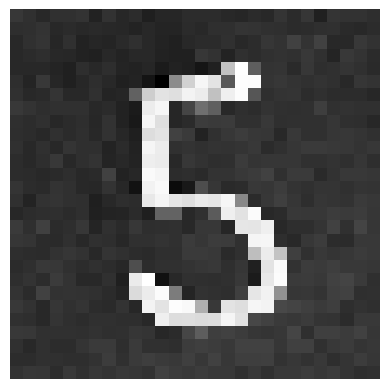

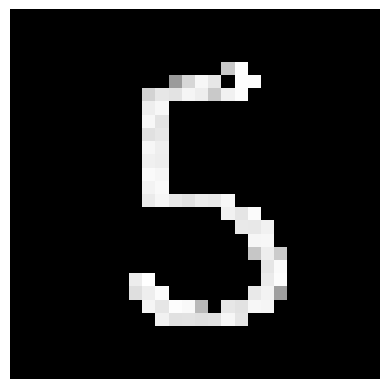

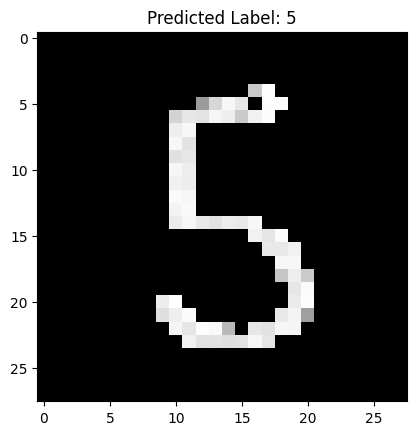

(218, 218, 3)


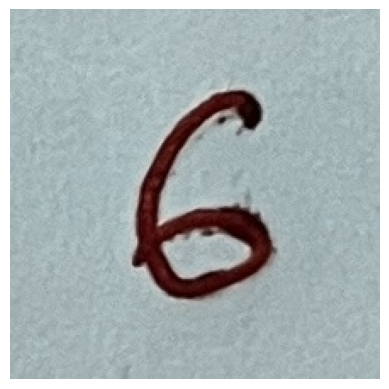

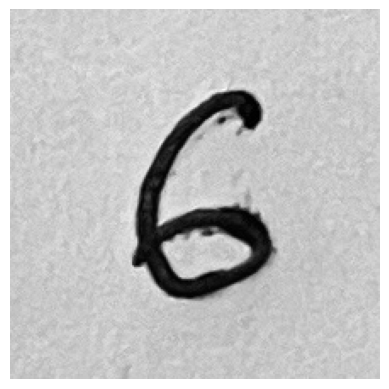

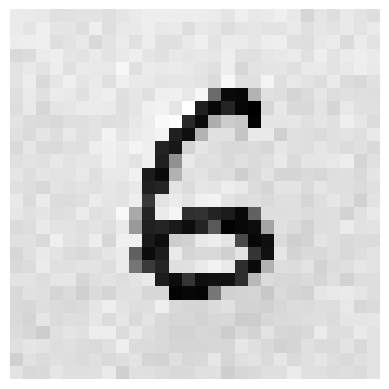

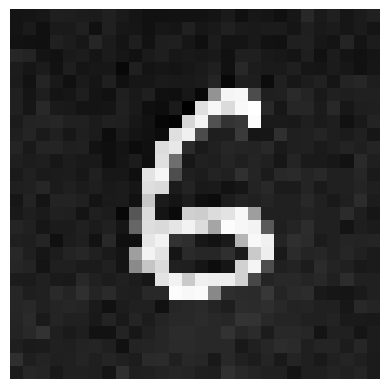

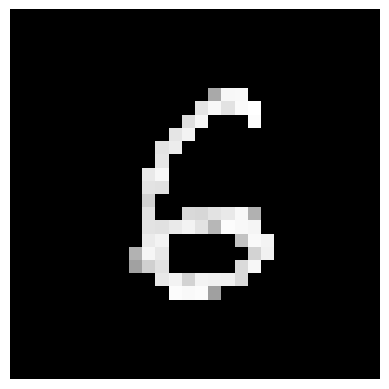

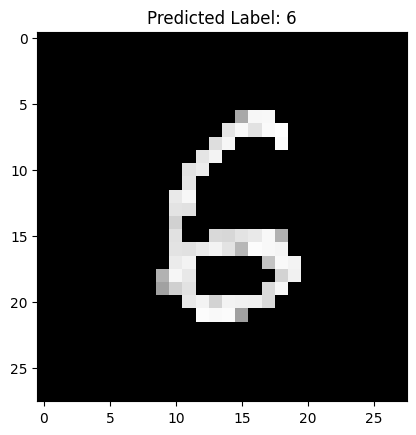

(214, 214, 3)


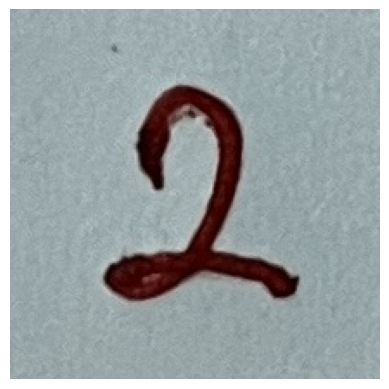

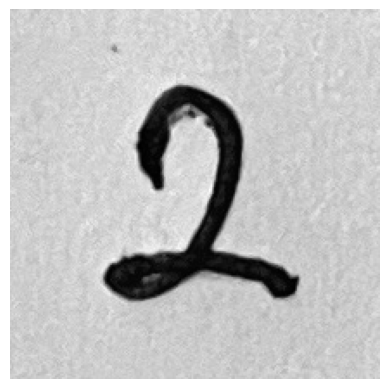

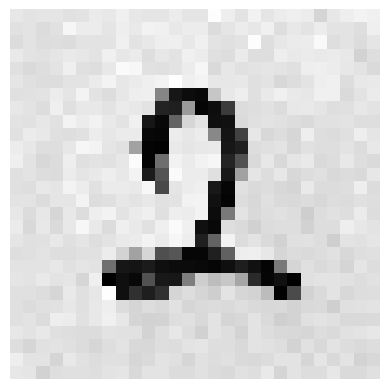

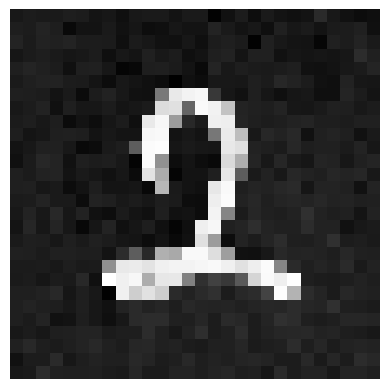

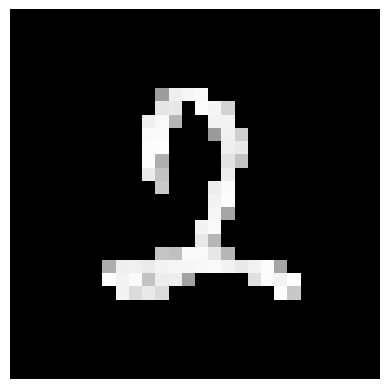

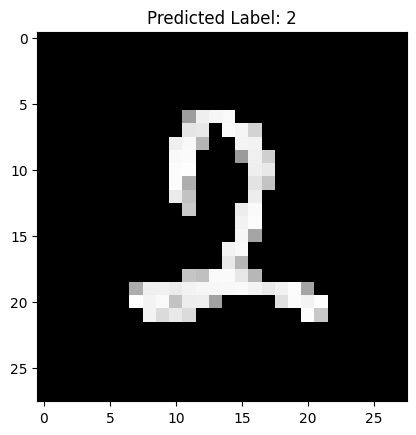

In [65]:
import glob

image_paths = glob.glob('/Users/anish/projects/notebooks/handwritten_digits/*.JPG')  # Adjust the path and file extension as needed
processed_images = []

for path in image_paths:
    processed_image = preprocess_image(path)
    predict(processed_image, 20, final_weights, final_bias, num_layers)